Enter the value of k: 5


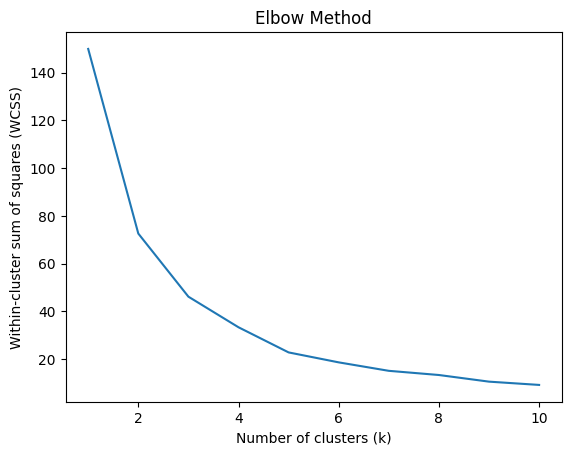


Cluster Centers:
   CustomerID        Age  Annual Income(k$)
0   23.500000  34.666667          25.333333
1   39.000000  52.000000          35.750000
2   15.400000  59.000000          21.800000
3   41.500000  26.000000          36.666667
4    8.153846  25.000000          17.769231

Counts per Cluster:
4    13
0    12
3    12
1     8
2     5
Name: Cluster, dtype: int64


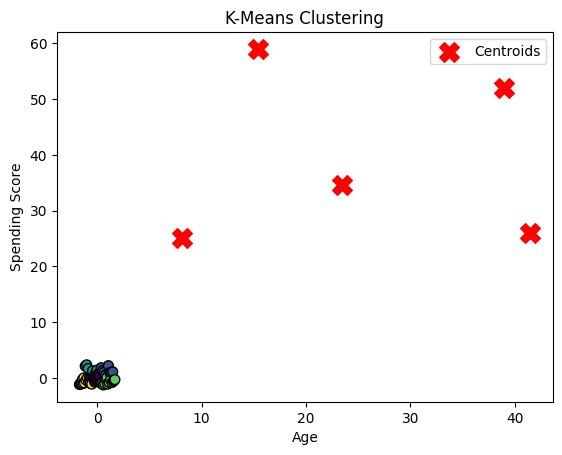

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset from a CSV file
# Replace "iris.csv" with the actual filename and path
df = pd.read_csv(r"Mall_Customers.csv")

# Extracting feature columns
feature_columns = df.columns[:-1]  # Exclude the last column (assuming it is the target variable)
X = df[feature_columns]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot the elbow method
def plot_elbow(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plotting the elbow method
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Within-cluster sum of squares (WCSS)')
    plt.show()

# Get user input for k
k_value = int(input("Enter the value of k: "))

# Implementing K-Means clustering
kmeans = KMeans(n_clusters=k_value, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Adding cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Plotting the elbow method to suggest a value for k
plot_elbow(X_scaled)

# Display the results
print("\nCluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=feature_columns))

print("\nCounts per Cluster:")
print(df['Cluster'].value_counts())

# Visualizing the clusters (for the first two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], marker='X', c='red', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.legend()
plt.show()
